In [10]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
airlines = pd.read_csv("Airlines/airlines.csv")
airports = pd.read_csv("Airlines/airports.csv", encoding= 'unicode_escape')
events = pd.read_csv("Airlines/events_US.csv", encoding= 'unicode_escape')
fares = pd.read_csv("Airlines/fares.csv")
flight_traffic = pd.read_csv("Airlines/flight_traffic.csv")
stocks = pd.read_csv("Airlines/stock_prices.csv")
weather = pd.read_csv("Airlines/weather.csv")
airline_id = pd.read_csv("Airlines/AIRLINE_ID.csv")
passengers = pd.read_csv("Airlines/passengers.csv")


## Looking at the data

In [12]:
airlines.head()

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


In [147]:
airlines

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.
5,AS,Alaska Airlines Inc.
6,9K,Hyannis Air Service Inc.
7,BB,Seaborne Airlines
8,KS,Penair
9,ZK,Great Lakes Aviation Ltd.


In [13]:
airports.head()

,airport_id,airport_name,city,state,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,31.53552,-84.19447


In [14]:
events.head()

,date,city,state,event_name
0,2/1/17,St. Louis,MO,NHL Winter Classic
1,4/1/17,New York,NY,National Board of Review of Motion Pictures Aw...
2,5/1/17,New York,NY,Winter Jazzfest NYC
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
4,5/1/17,New York,NY,Jazz Connect Conference


In [15]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


In [16]:
flight_traffic.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,...,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,...,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,...,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


In [30]:
flight_traffic.columns

Index(['year', 'month', 'day', 'airline_id', 'origin_airport',
       'destination_airport', 'scheduled_departure', 'actual_departure',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'scheduled_arrival',
       'actual_arrival', 'cancelled', 'diverted', 'scheduled_elapsed',
       'actual_elapsed', 'distance', 'airline_delay', 'weather_delay',
       'air_system_delay', 'security_delay', 'aircraft_delay'],
      dtype='object')

In [17]:
stocks.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85


In [18]:
weather.head()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN


In [19]:
passengers.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,YEAR,QUARTER,MONTH,CLASS,Unnamed: 15
0,0.0,106.0,0.0,1050.0,19393,10529,30529,BDL,13487,31650,MSP,2017,1,1,F,NaN
1,0.0,810.0,0.0,1751.0,19393,10693,30693,BNA,13891,32575,ONT,2017,1,1,F,NaN
2,0.0,1281.0,0.0,1978.0,19393,10693,30693,BNA,14747,30559,SEA,2017,1,1,F,NaN
3,0.0,109.0,0.0,1668.0,19393,10800,32575,BUR,13495,33495,MSY,2017,1,1,F,NaN
4,0.0,210.0,0.0,1174.0,19393,11042,30647,CLE,10423,30423,AUS,2017,1,1,F,NaN


In [21]:
airline_id.head()

,Code,Airline
0,19031,MAC
1,19032,XY
2,19033,COC
3,19034,GSA
4,19035,RZZ


In [23]:
# join passengers and airline id
passengers = passengers.merge(airline_id, how='left', left_on = 'AIRLINE_ID', right_on = 'Code')
passengers.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,YEAR,QUARTER,MONTH,CLASS,Unnamed: 15,Code,Airline
0,0.0,106.0,0.0,1050.0,19393,10529,30529,BDL,13487,31650,MSP,2017,1,1,F,NaN,19393,WN
1,0.0,810.0,0.0,1751.0,19393,10693,30693,BNA,13891,32575,ONT,2017,1,1,F,NaN,19393,WN
2,0.0,1281.0,0.0,1978.0,19393,10693,30693,BNA,14747,30559,SEA,2017,1,1,F,NaN,19393,WN
3,0.0,109.0,0.0,1668.0,19393,10800,32575,BUR,13495,33495,MSY,2017,1,1,F,NaN,19393,WN
4,0.0,210.0,0.0,1174.0,19393,11042,30647,CLE,10423,30423,AUS,2017,1,1,F,NaN,19393,WN


Passengers: On-Flight Market Passengers Enplaned

Freight: On-Flight Market Freight Enplaned (pounds)

Mail: On-Flight Market Mail Enplaned (pounds)

Distance: Distance between airports (miles)

(array([  2.29518000e+05,   1.30690000e+04,   4.71500000e+03,
          2.15000000e+03,   1.20600000e+03,   5.04000000e+02,
          1.90000000e+02,   9.60000000e+01,   3.80000000e+01,
          2.70000000e+01]),
 array([     0. ,   9166.4,  18332.8,  27499.2,  36665.6,  45832. ,
         54998.4,  64164.8,  73331.2,  82497.6,  91664. ]),
 <a list of 10 Patch objects>)

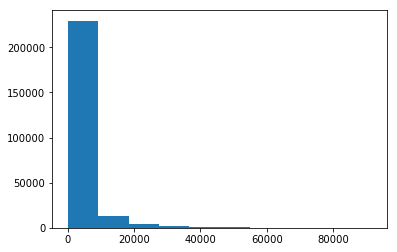

In [35]:
plt.hist(passengers["PASSENGERS"])

(array([  2.51409000e+05,   9.80000000e+01,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([       0. ,   766066.3,  1532132.6,  2298198.9,  3064265.2,
         3830331.5,  4596397.8,  5362464.1,  6128530.4,  6894596.7,
         7660663. ]),
 <a list of 10 Patch objects>)

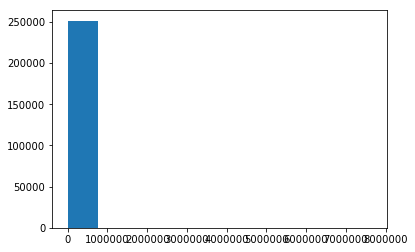

In [37]:
plt.hist(passengers["MAIL"])

In [46]:
passengers.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,YEAR,QUARTER,MONTH,CLASS,Unnamed: 15,Code,Airline
0,0.0,106.0,0.0,1050.0,19393,10529,30529,BDL,13487,31650,MSP,2017,1,1,F,NaN,19393,WN
1,0.0,810.0,0.0,1751.0,19393,10693,30693,BNA,13891,32575,ONT,2017,1,1,F,NaN,19393,WN
2,0.0,1281.0,0.0,1978.0,19393,10693,30693,BNA,14747,30559,SEA,2017,1,1,F,NaN,19393,WN
3,0.0,109.0,0.0,1668.0,19393,10800,32575,BUR,13495,33495,MSY,2017,1,1,F,NaN,19393,WN
4,0.0,210.0,0.0,1174.0,19393,11042,30647,CLE,10423,30423,AUS,2017,1,1,F,NaN,19393,WN


In [58]:
# any relationship between stock price and number of passengers?
stocks['timestamp'] = pd.to_datetime(stocks['timestamp'])
stocks = stocks[(stocks['timestamp'] >= '2017-01-01') & (stocks['timestamp'] <= '2017-12-31')]
airlines_with_stocks = list(stocks.columns[1:])
print(airlines_with_stocks, len(airlines_with_stocks))
# stocks.head()

# filter the passenger data so we only have the airlines in airlines_with_stocks
passengers['Airline'] = passengers['Airline'].str.strip()
filtered_passengers = passengers.loc[passengers['Airline'].isin(airlines_with_stocks)]
print(passengers.shape, filtered_passengers.shape)


['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA'] 9
(251513, 18) (106632, 18)


In [61]:
# look per airline 
aa = filtered_passengers[filtered_passengers["Airline"] == "AA"]
ua = filtered_passengers[filtered_passengers["Airline"] == "UA"]
b6 = filtered_passengers[filtered_passengers["Airline"] == "B6"]
oo = filtered_passengers[filtered_passengers["Airline"] == "OO"]
as1 = filtered_passengers[filtered_passengers["Airline"] == "AS"]
nk = filtered_passengers[filtered_passengers["Airline"] == "NK"]
wn = filtered_passengers[filtered_passengers["Airline"] == "WN"]
dl = filtered_passengers[filtered_passengers["Airline"] == "DL"]
ha = filtered_passengers[filtered_passengers["Airline"] == "HA"]
print(aa.shape, ua.shape, b6.shape, oo.shape, as1.shape, nk.shape, wn.shape, dl.shape, ha.shape)

(13660, 18) (12537, 18) (4326, 18) (13920, 18) (3877, 18) (4524, 18) (40640, 18) (12480, 18) (668, 18)


In [88]:
aa.groupby(['MONTH'])['PASSENGERS'].sum()

MONTH
1      8852699.0
2      8313892.0
3     10234947.0
4      9613362.0
5     10144666.0
6     10254197.0
7     10477147.0
8     10370074.0
9      8857315.0
10    10198972.0
11     9492603.0
12     9718443.0
Name: PASSENGERS, dtype: float64

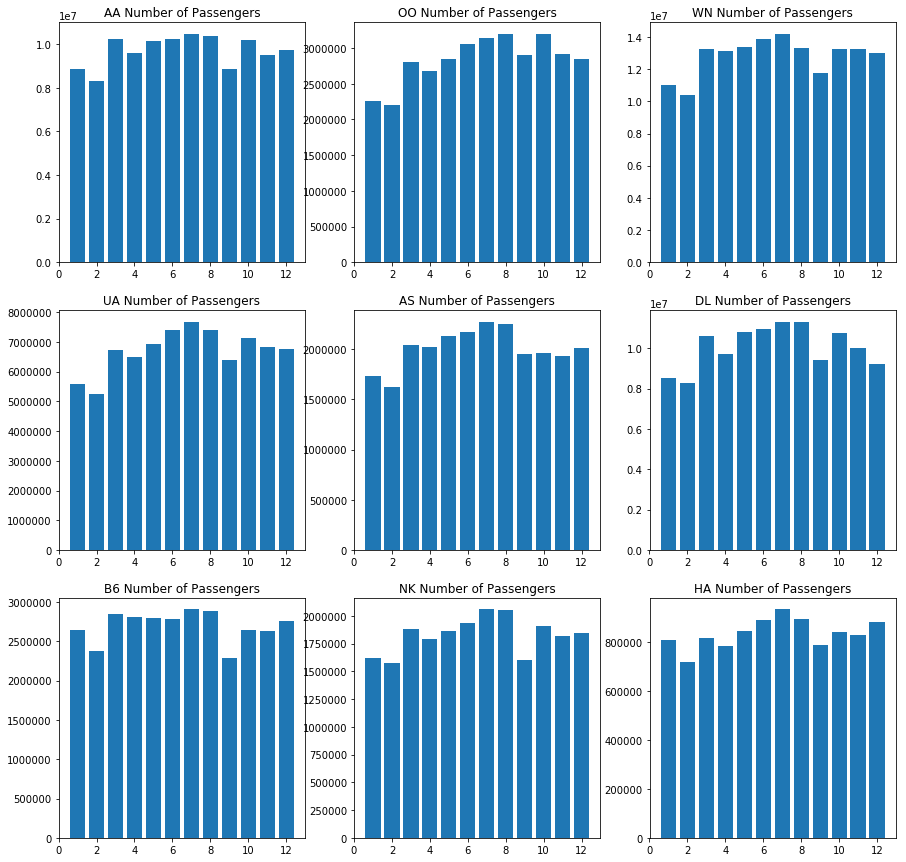

In [102]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

ind = aa.groupby(['MONTH'])['PASSENGERS'].sum().index
passen = aa.groupby(['MONTH'])['PASSENGERS'].sum().values
frei = aa.groupby(['MONTH'])['FREIGHT'].sum().values
mail = aa.groupby(['MONTH'])['MAIL'].sum().values

# ax[0, 0].bar(ind, passen, label = "passengers", color = "blue", bottom = frei + mail)
# ax[0, 0].bar(ind, frei, label = "freight", color = "red", bottom = mail)
# ax[0, 0].bar(ind, mail, label = "mail", color = "green")
# ax[0, 0].set_title('AA Number of Passengers')

ax[0, 0].bar(ind, aa.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[0, 0].set_title('AA Number of Passengers')

ax[1, 0].bar(ind, ua.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[1, 0].set_title('UA Number of Passengers')

ax[2, 0].bar(ind, b6.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[2, 0].set_title('B6 Number of Passengers')

ax[0, 1].bar(ind, oo.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[0, 1].set_title('OO Number of Passengers')

ax[1, 1].bar(ind, as1.groupby(['MONTH'])['PASSENGERS'].sum().values)
ax[1, 1].set_title('AS Number of Passengers')

ax[2, 1].bar(ind, nk.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[2, 1].set_title('NK Number of Passengers')

ax[0, 2].bar(ind, wn.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[0, 2].set_title('WN Number of Passengers')

ax[1, 2].bar(ind, dl.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[1, 2].set_title('DL Number of Passengers')

ax[2, 2].bar(ind, ha.groupby(['MONTH'])['PASSENGERS'].sum().values) 
ax[2, 2].set_title('HA Number of Passengers')

plt.show()

# # plt.subplot(2,2,1)
# aa.groupby(['MONTH'])['PASSENGERS'].sum().plot(kind='bar')
# ax[0, 0].title('AA Number of Passengers')

# # plt.subplot(2,2,2)
# ua.groupby(['MONTH'])['PASSENGERS'].sum().plot(kind='bar')
# plt.title('UA Number of Passengers')

# # plt.subplot(2,2,3)
# b6.groupby(['MONTH'])['PASSENGERS'].sum().plot(kind='bar')
# plt.title('B6 Number of Passengers')

# # plt.subplot(2,2,4)
# oo.groupby(['MONTH'])['PASSENGERS'].sum().plot(kind='bar')
# plt.title('OO Number of Passengers');

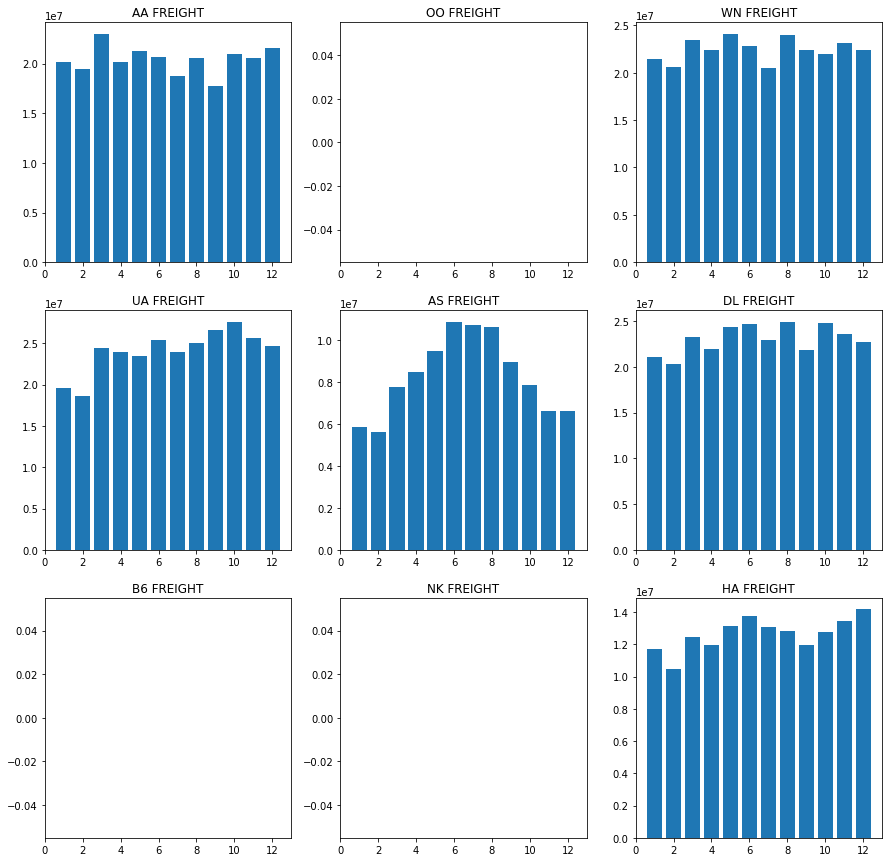

In [99]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

ax[0, 0].bar(ind, aa.groupby(['MONTH'])['FREIGHT'].sum().values)
ax[0, 0].set_title('AA FREIGHT')

ax[1, 0].bar(ind, ua.groupby(['MONTH'])['FREIGHT'].sum().values) 
ax[1, 0].set_title('UA FREIGHT')

ax[2, 0].bar(ind, b6.groupby(['MONTH'])['FREIGHT'].sum().values) 
ax[2, 0].set_title('B6 FREIGHT')

ax[0, 1].bar(ind, oo.groupby(['MONTH'])['FREIGHT'].sum().values) 
ax[0, 1].set_title('OO FREIGHT')

ax[1, 1].bar(ind, as1.groupby(['MONTH'])['FREIGHT'].sum().values)
ax[1, 1].set_title('AS FREIGHT')

ax[2, 1].bar(ind, nk.groupby(['MONTH'])['FREIGHT'].sum().values) 
ax[2, 1].set_title('NK FREIGHT')

ax[0, 2].bar(ind, wn.groupby(['MONTH'])['FREIGHT'].sum().values) 
ax[0, 2].set_title('WN FREIGHT')

ax[1, 2].bar(ind, dl.groupby(['MONTH'])['FREIGHT'].sum().values) 
ax[1, 2].set_title('DL FREIGHT')

ax[2, 2].bar(ind, ha.groupby(['MONTH'])['FREIGHT'].sum().values) 
ax[2, 2].set_title('HA FREIGHT')

plt.show()

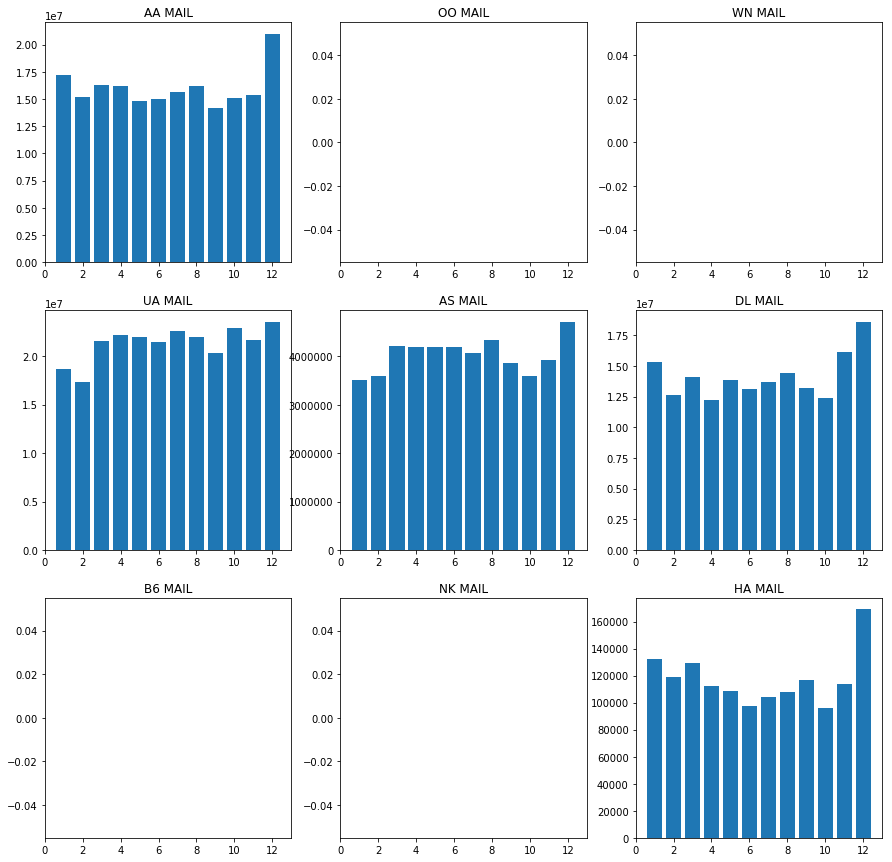

In [100]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

ax[0, 0].bar(ind, aa.groupby(['MONTH'])['MAIL'].sum().values)
ax[0, 0].set_title('AA MAIL')

ax[1, 0].bar(ind, ua.groupby(['MONTH'])['MAIL'].sum().values) 
ax[1, 0].set_title('UA MAIL')

ax[2, 0].bar(ind, b6.groupby(['MONTH'])['MAIL'].sum().values) 
ax[2, 0].set_title('B6 MAIL')

ax[0, 1].bar(ind, oo.groupby(['MONTH'])['MAIL'].sum().values) 
ax[0, 1].set_title('OO MAIL')

ax[1, 1].bar(ind, as1.groupby(['MONTH'])['MAIL'].sum().values)
ax[1, 1].set_title('AS MAIL')

ax[2, 1].bar(ind, nk.groupby(['MONTH'])['MAIL'].sum().values) 
ax[2, 1].set_title('NK MAIL')

ax[0, 2].bar(ind, wn.groupby(['MONTH'])['MAIL'].sum().values) 
ax[0, 2].set_title('WN MAIL')

ax[1, 2].bar(ind, dl.groupby(['MONTH'])['MAIL'].sum().values) 
ax[1, 2].set_title('DL MAIL')

ax[2, 2].bar(ind, ha.groupby(['MONTH'])['MAIL'].sum().values) 
ax[2, 2].set_title('HA MAIL')

plt.show()

All the airlines have passengers (which tends to be higher in the summer months), and a few carry freight and mail. The only airlines that do not have mail or freight are: OO, B6, NK. WN has freight but not mail. The rest have both freight and mail.

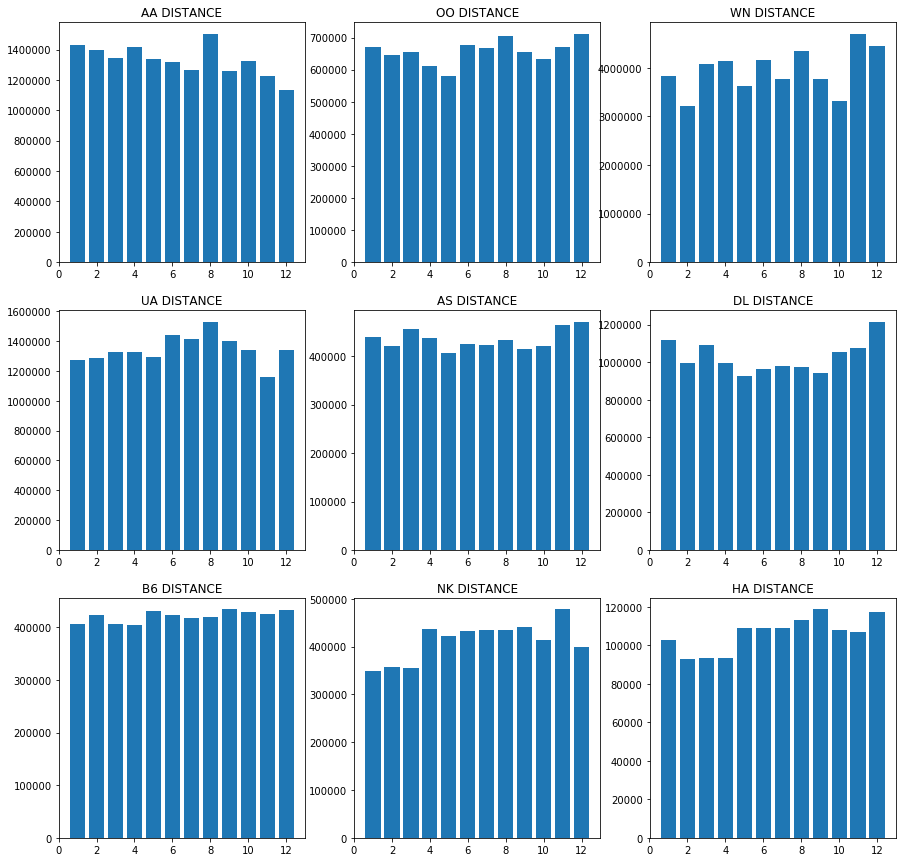

In [104]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

ax[0, 0].bar(ind, aa.groupby(['MONTH'])['DISTANCE'].sum().values)
ax[0, 0].set_title('AA DISTANCE')

ax[1, 0].bar(ind, ua.groupby(['MONTH'])['DISTANCE'].sum().values) 
ax[1, 0].set_title('UA DISTANCE')

ax[2, 0].bar(ind, b6.groupby(['MONTH'])['DISTANCE'].sum().values) 
ax[2, 0].set_title('B6 DISTANCE')

ax[0, 1].bar(ind, oo.groupby(['MONTH'])['DISTANCE'].sum().values) 
ax[0, 1].set_title('OO DISTANCE')

ax[1, 1].bar(ind, as1.groupby(['MONTH'])['DISTANCE'].sum().values)
ax[1, 1].set_title('AS DISTANCE')

ax[2, 1].bar(ind, nk.groupby(['MONTH'])['DISTANCE'].sum().values) 
ax[2, 1].set_title('NK DISTANCE')

ax[0, 2].bar(ind, wn.groupby(['MONTH'])['DISTANCE'].sum().values) 
ax[0, 2].set_title('WN DISTANCE')

ax[1, 2].bar(ind, dl.groupby(['MONTH'])['DISTANCE'].sum().values) 
ax[1, 2].set_title('DL DISTANCE')

ax[2, 2].bar(ind, ha.groupby(['MONTH'])['DISTANCE'].sum().values) 
ax[2, 2].set_title('HA DISTANCE')

plt.show()

In [108]:
stocks["month"] = stocks["timestamp"].dt.month

We only have month as the smallest time value (not day) for the passenger data so will need to look at the average stock per month so we can compare them

In [111]:
airlines_with_stocks

['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']

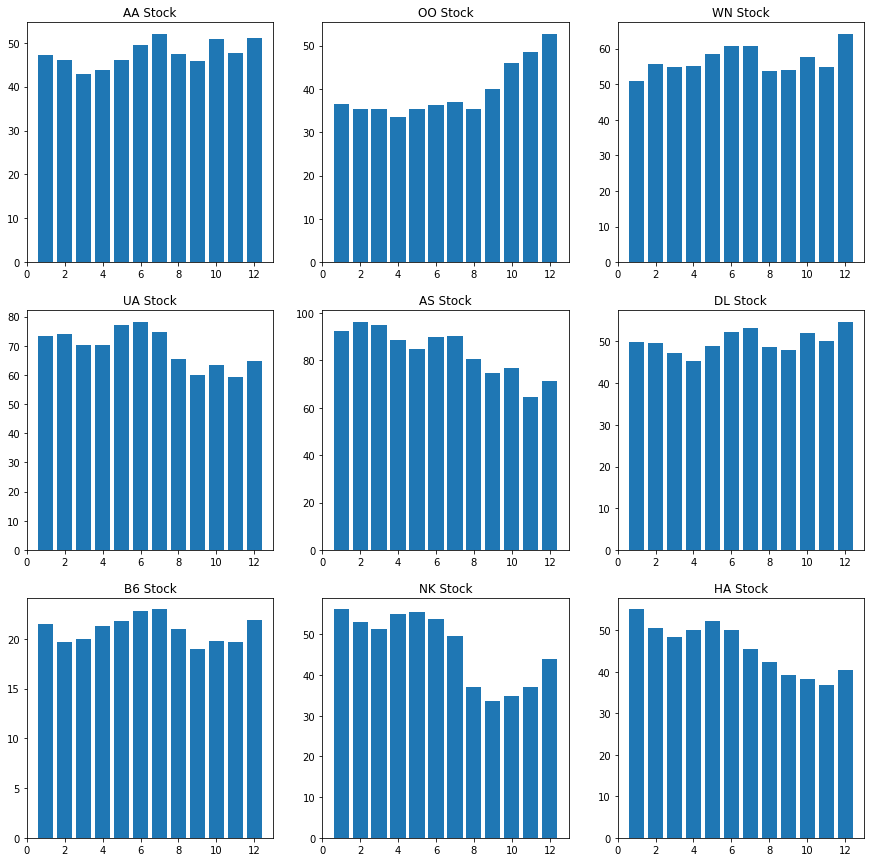

In [116]:
# look at the general stock trend per month over the course of the year
fig, ax = plt.subplots(3, 3, figsize=(15,15))
i = 0
j = 0
for airline in airlines_with_stocks:
    ax[i, j].bar(ind, stocks.groupby(['month'])[airline].mean().values)
    ax[i, j].set_title(str(airline) + ' Stock')
    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

Pearsons correlation for AA 0.318
Pearsons correlation for UA -0.032
Pearsons correlation for B6 0.700
Pearsons correlation for OO 0.252
Pearsons correlation for AS -0.116
Pearsons correlation for NK -0.129
Pearsons correlation for WN 0.525
Pearsons correlation for DL 0.094
Pearsons correlation for HA -0.232


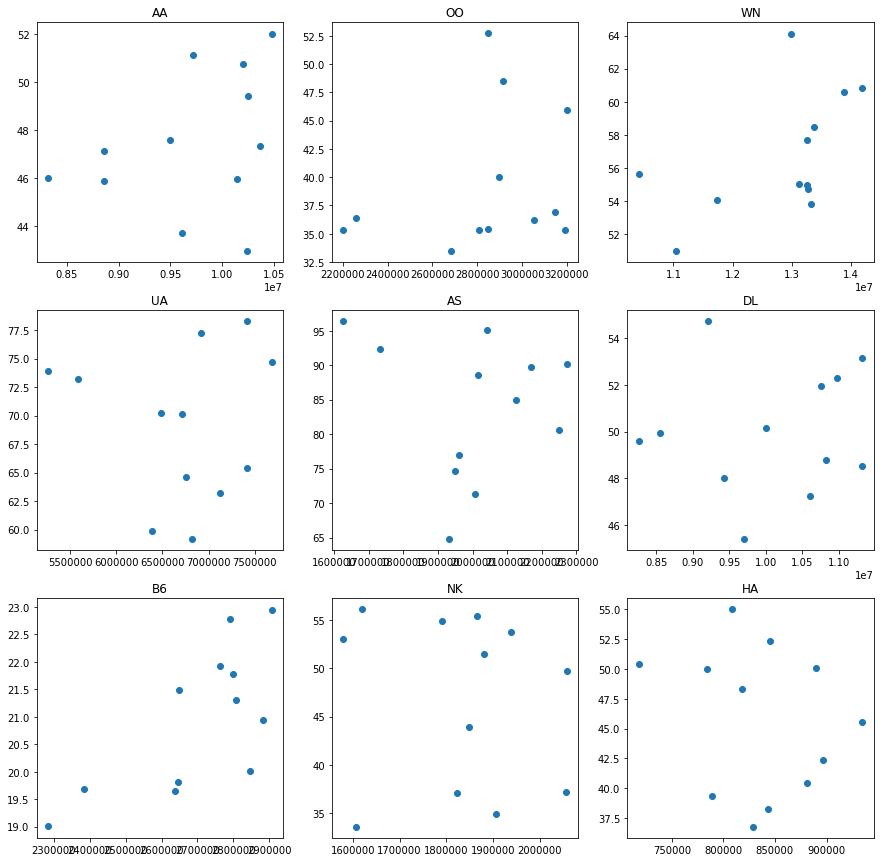

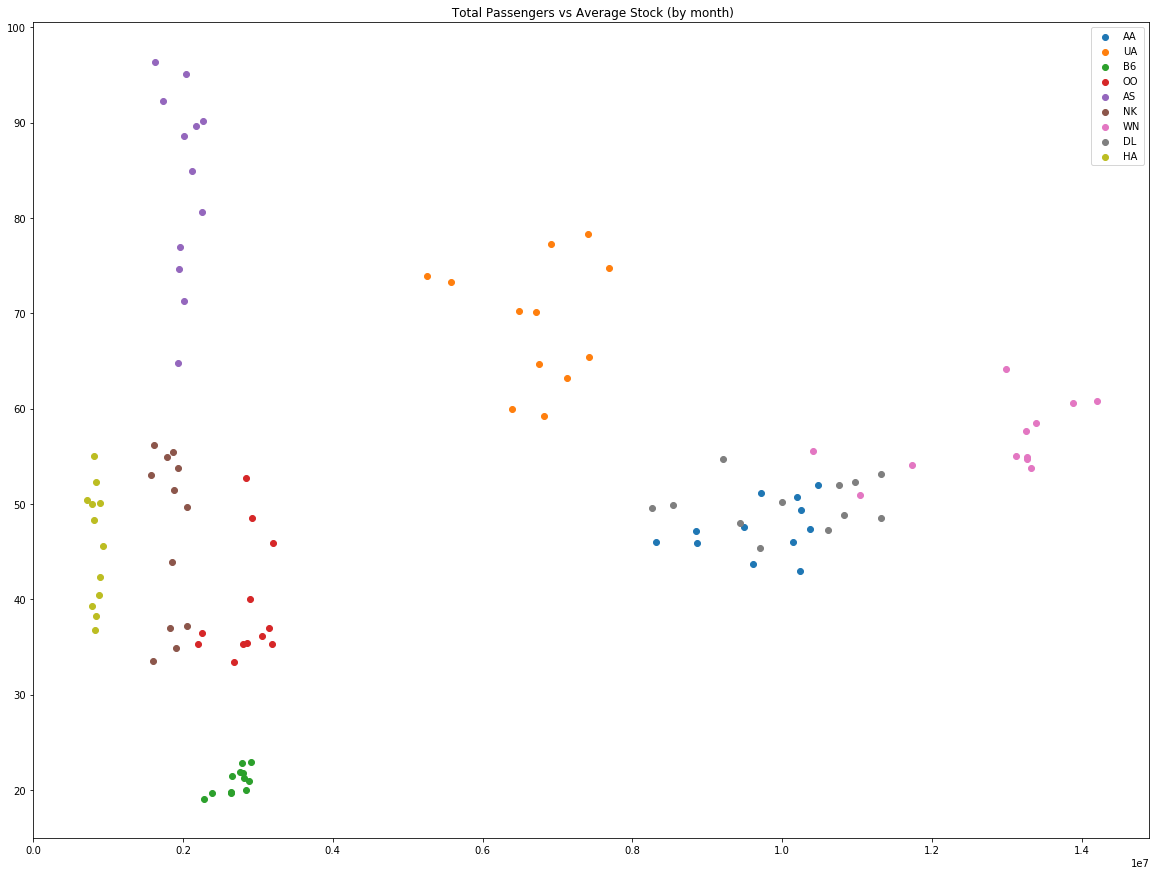

In [138]:
from scipy.stats import pearsonr
from matplotlib.pyplot import figure

fig, ax = plt.subplots(3, 3, figsize=(15,15))
i = 0
j = 0
for airline in airlines_with_stocks:
    total_pass = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['PASSENGERS'].sum().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    ax[i, j].scatter(total_pass, avg_stock, label=airline)
    ax[i, j].set_title(str(airline))

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1
        
figure(figsize=(20, 15))
for airline in airlines_with_stocks:
    total_pass = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['PASSENGERS'].sum().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    plt.scatter(total_pass, avg_stock, label=airline)
    plt.title(" Total Passengers vs Average Stock (by month)")
    plt.legend()
    corr, _ = pearsonr(total_pass, avg_stock)
    print('Pearson Correlation for ' + str(airline) + ' %.3f' % corr)

Pearsons correlation for AA 0.269
Pearsons correlation for UA -0.592
Pearsons correlation for AS 0.164
Pearsons correlation for WN -0.101
Pearsons correlation for DL 0.024
Pearsons correlation for HA 0.197


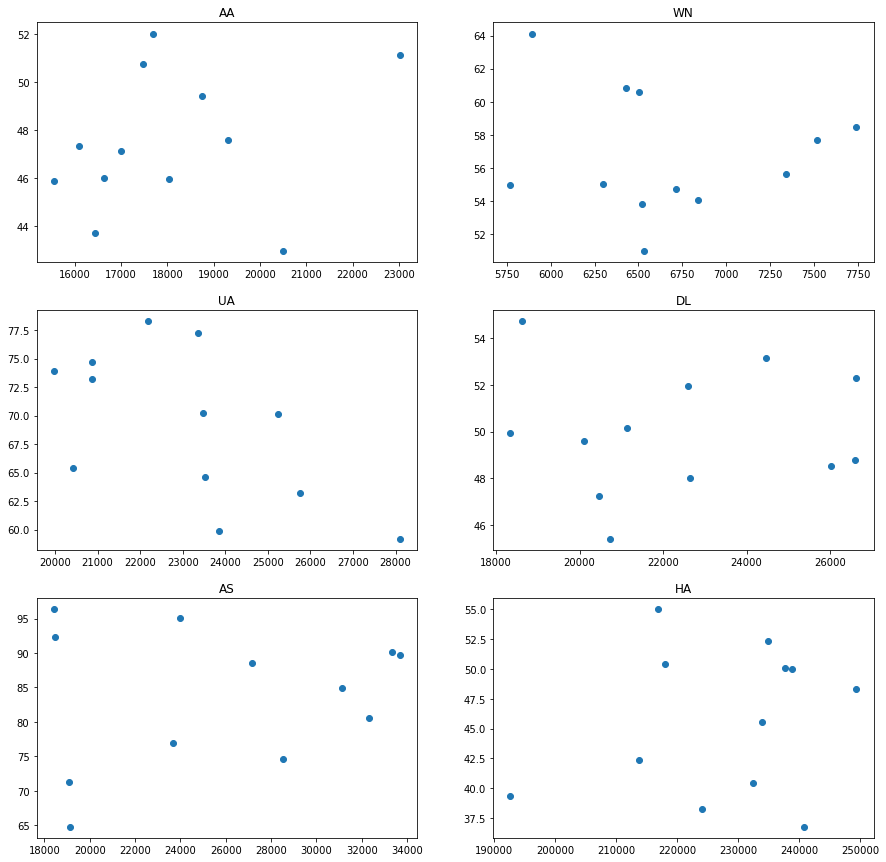

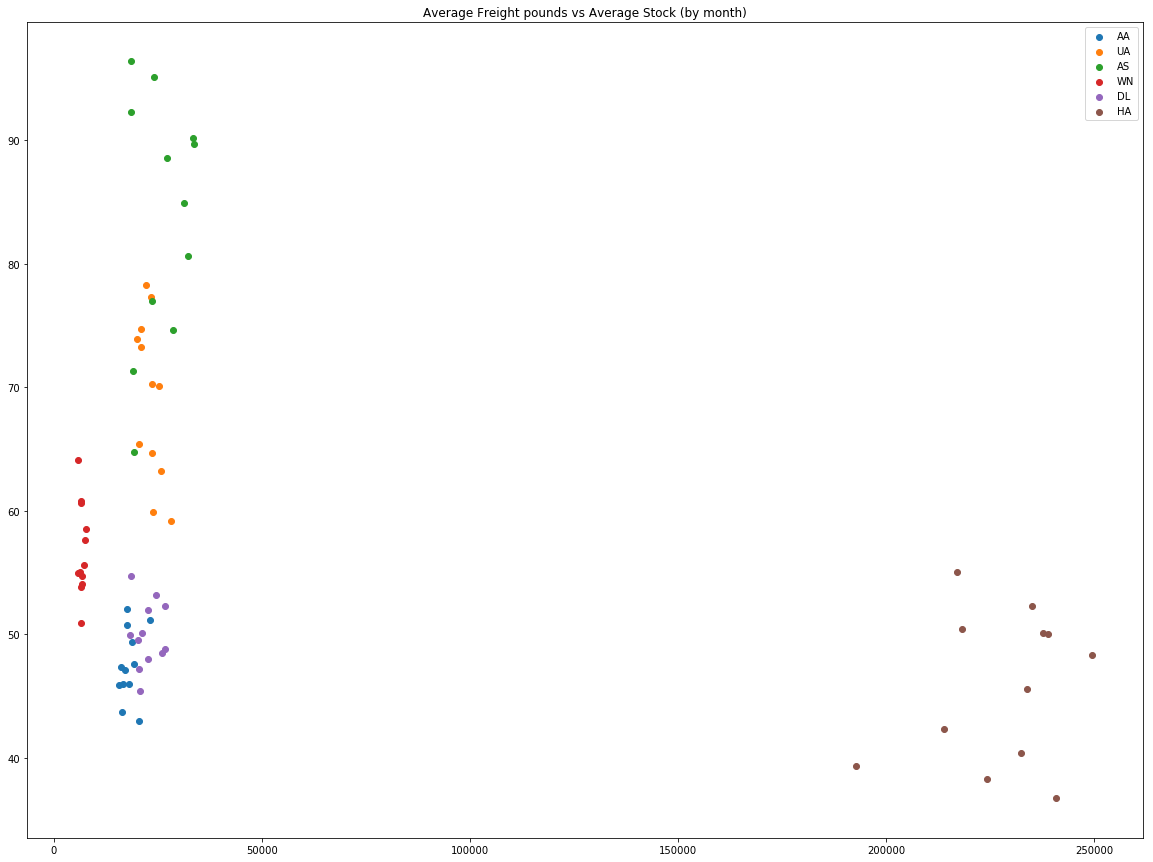

In [142]:
# avg stock price versus freight
freight_airlines = ['AA', 'UA', 'AS', 'WN', 'DL', 'HA']

fig, ax = plt.subplots(3, 2, figsize=(15,15))
i = 0
j = 0
for airline in freight_airlines:
    avg_freight = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['FREIGHT'].mean().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    ax[i, j].scatter(avg_freight, avg_stock, label=airline)
    ax[i, j].set_title(str(airline))

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

figure(figsize=(20, 15))
for airline in freight_airlines:
    avg_freight = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['FREIGHT'].mean().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    plt.scatter(avg_freight, avg_stock, label=airline)
    plt.title("Average Freight pounds vs Average Stock (by month)")
    plt.legend()
    corr, _ = pearsonr(avg_freight, avg_stock)
    print('Pearson Correlation for ' + str(airline) + ' %.3f' % corr)


Pearsons correlation for AA 0.415
Pearsons correlation for UA -0.234
Pearsons correlation for AS 0.126
Pearsons correlation for DL 0.420
Pearsons correlation for HA 0.262


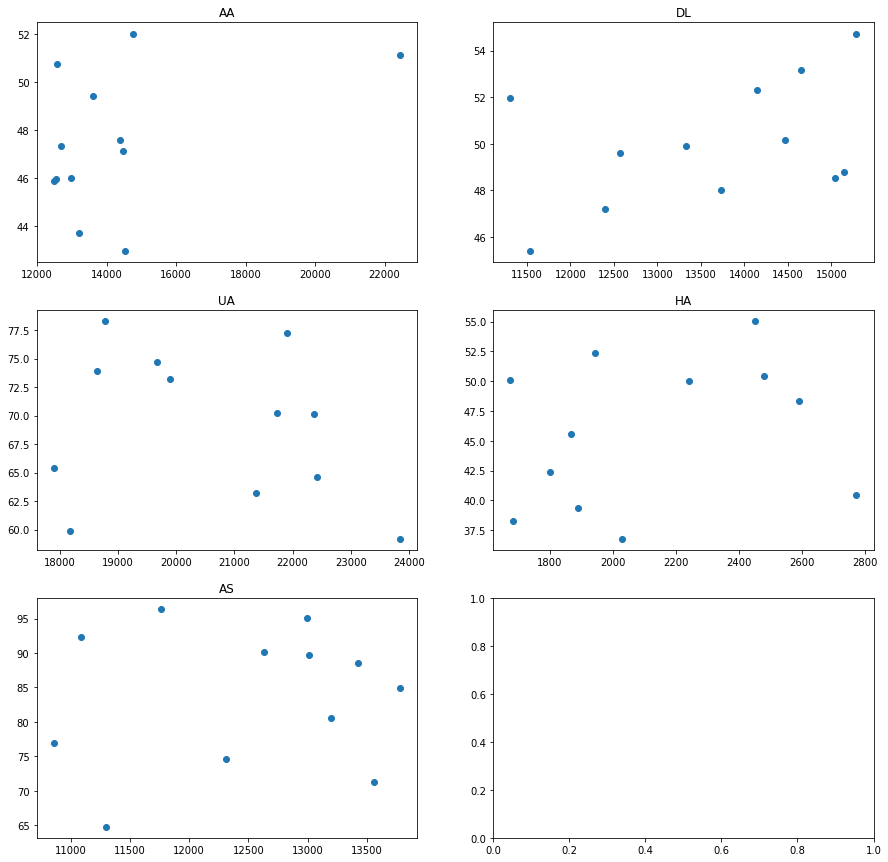

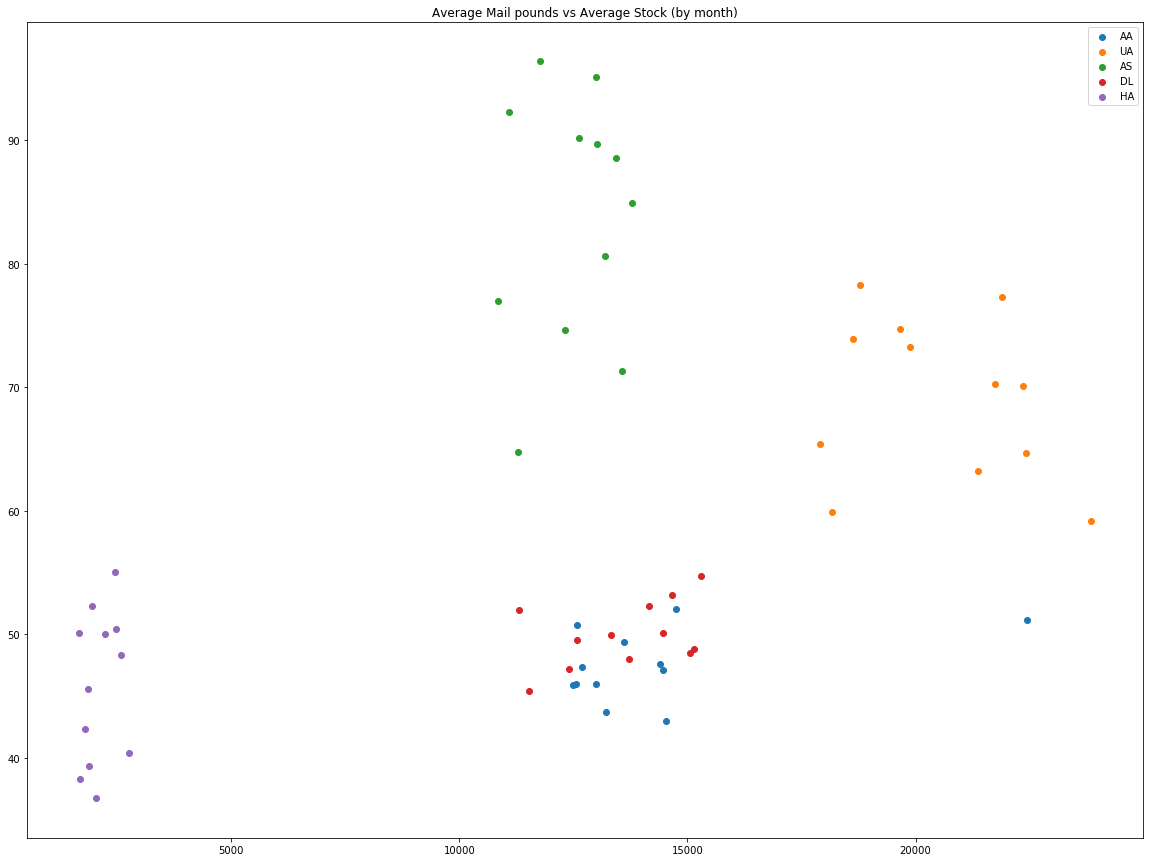

In [143]:
# avg stock price versus mail
mail_airlines = ['AA', 'UA', 'AS', 'DL', 'HA']
fig, ax = plt.subplots(3, 2, figsize=(15,15))
i = 0
j = 0
for airline in mail_airlines:
    avg_mail = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['MAIL'].mean().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    ax[i, j].scatter(avg_mail, avg_stock, label=airline)
    ax[i, j].set_title(str(airline))

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

figure(figsize=(20, 15))
for airline in mail_airlines:
    avg_mail = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['MAIL'].mean().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    plt.scatter(avg_mail, avg_stock, label=airline)
    plt.title("Average Mail pounds vs Average Stock (by month)")
    plt.legend()
    corr, _ = pearsonr(avg_mail, avg_stock)
    print('Pearson Correlation for ' + str(airline) + ' %.3f' % corr)

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

Pearsons correlation for AA 0.113
Pearsons correlation for UA 0.316
Pearsons correlation for B6 -0.077
Pearsons correlation for OO -0.235
Pearsons correlation for AS 0.487
Pearsons correlation for NK -0.604
Pearsons correlation for WN 0.275
Pearsons correlation for DL 0.543
Pearsons correlation for HA 0.015


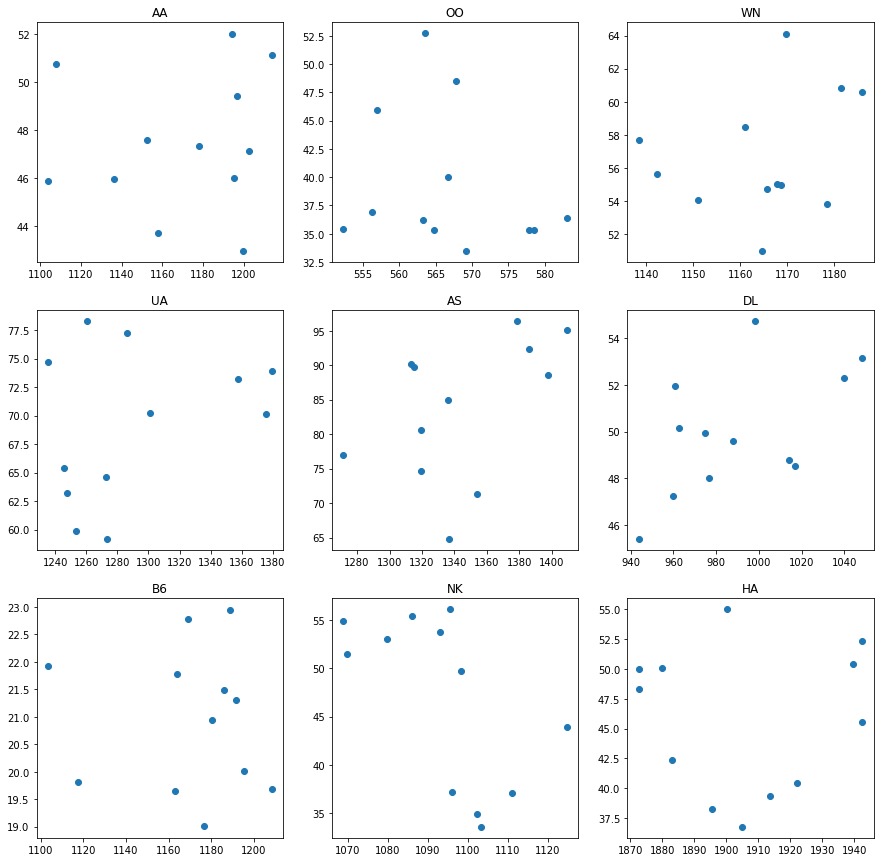

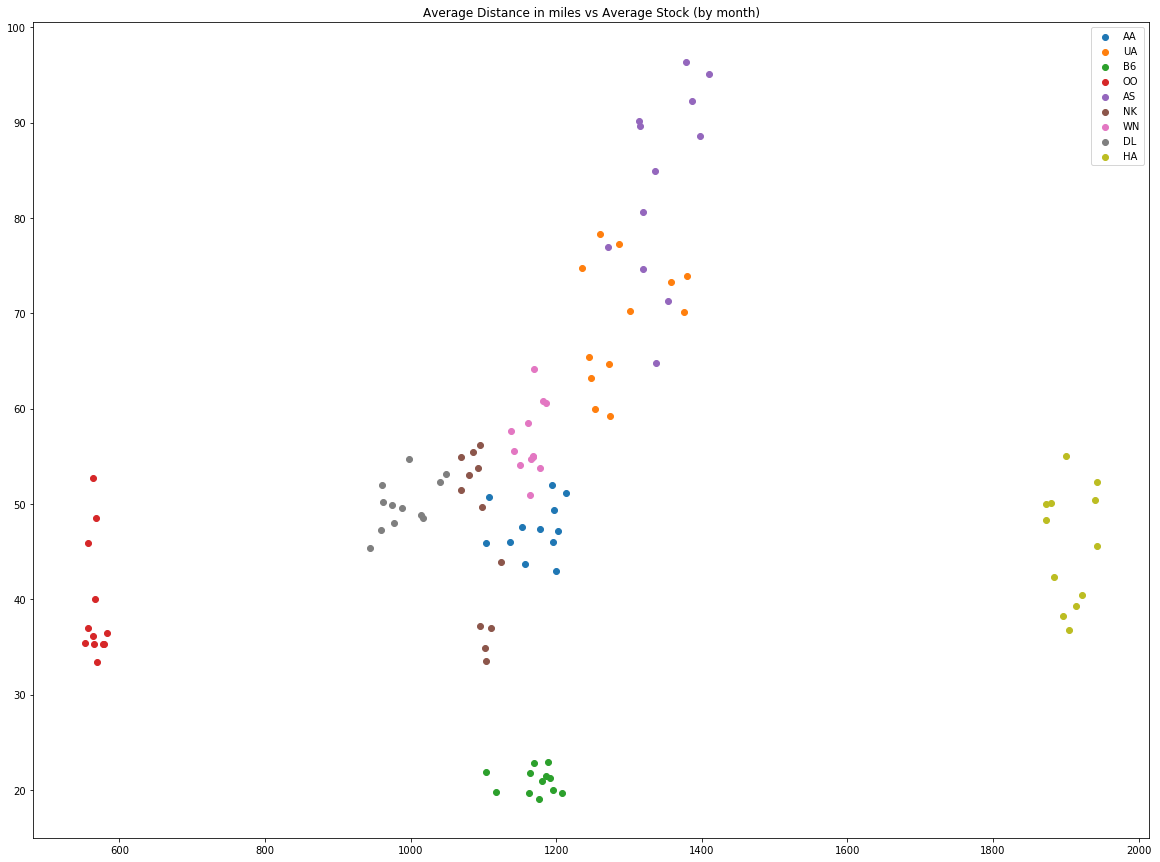

In [144]:
# avg stock price versus avg distance

fig, ax = plt.subplots(3, 3, figsize=(15,15))
i = 0
j = 0
for airline in airlines_with_stocks:
    avg_distance = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['DISTANCE'].mean().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    ax[i, j].scatter(avg_distance, avg_stock, label=airline)
    ax[i, j].set_title(str(airline))

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

figure(figsize=(20, 15))
for airline in airlines_with_stocks:
    avg_distance = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['DISTANCE'].mean().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    plt.scatter(avg_distance, avg_stock, label=airline)
    plt.title("Average Distance in miles vs Average Stock (by month)")
    plt.legend()
    corr, _ = pearsonr(avg_distance, avg_stock)
    print('Pearson Correlation for ' + str(airline) + ' %.3f' % corr)

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

Pearsons correlation for AA -0.474
Pearsons correlation for UA 0.145
Pearsons correlation for B6 -0.152
Pearsons correlation for OO 0.396
Pearsons correlation for AS -0.342
Pearsons correlation for NK -0.497
Pearsons correlation for WN 0.081
Pearsons correlation for DL 0.400
Pearsons correlation for HA -0.561


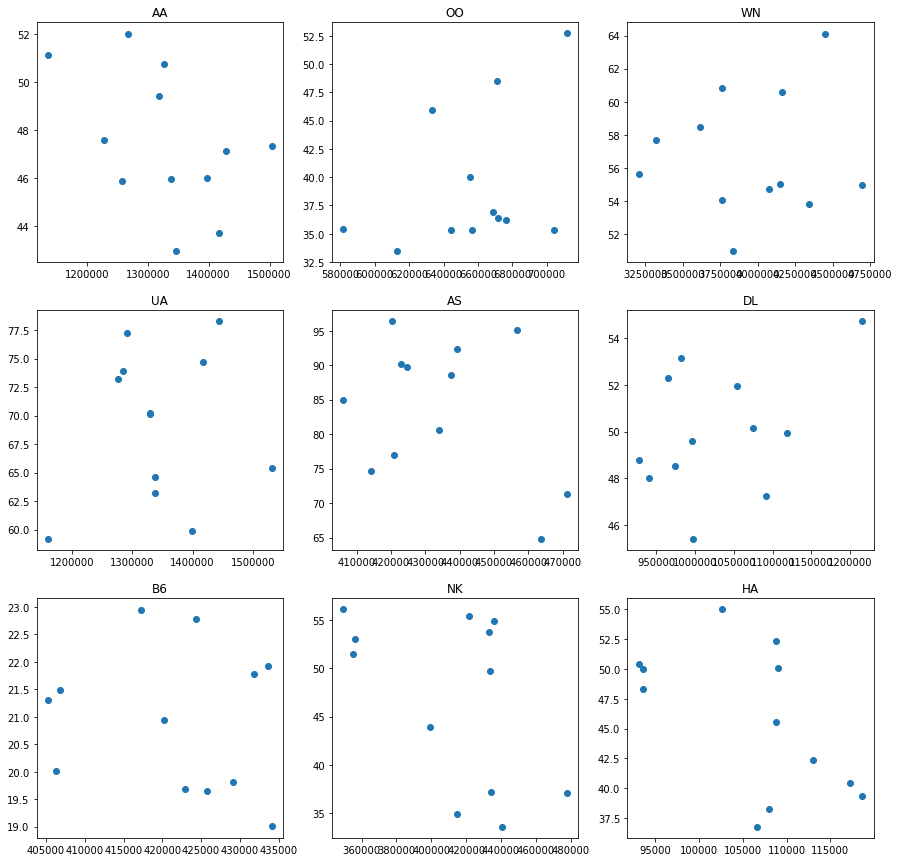

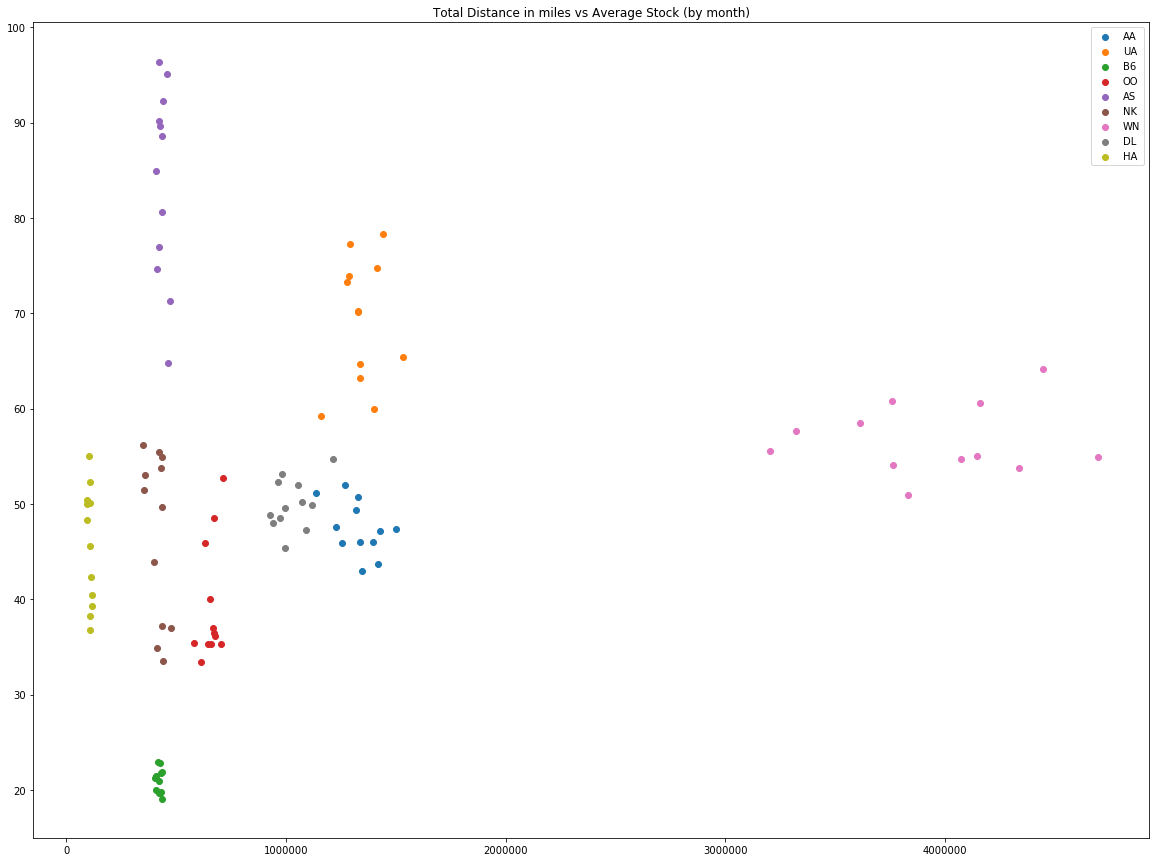

In [145]:
# avg stock price versus total distance

fig, ax = plt.subplots(3, 3, figsize=(15,15))
i = 0
j = 0
for airline in airlines_with_stocks:
    sum_distance = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['DISTANCE'].sum().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    ax[i, j].scatter(sum_distance, avg_stock, label=airline)
    ax[i, j].set_title(str(airline))

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

figure(figsize=(20, 15))
for airline in airlines_with_stocks:
    sum_distance = filtered_passengers[filtered_passengers["Airline"] == airline].groupby(['MONTH'])['DISTANCE'].sum().values
    avg_stock = stocks.groupby(['month'])[airline].mean().values

    plt.scatter(sum_distance, avg_stock, label=airline)
    plt.title("Total Distance in miles vs Average Stock (by month)")
    plt.legend()
    corr, _ = pearsonr(sum_distance, avg_stock)
    print('Pearson Correlation for ' + str(airline) + ' %.3f' % corr)

    if i < 2:
        i += 1
    else:
        i = 0
        j += 1